<a href="https://colab.research.google.com/github/kornellewy/sathelp/blob/master/apple_ver_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 35.99 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [2]:
%cd PlantVillage-Dataset

/content/PlantVillage-Dataset


In [3]:
%cd raw

/content/PlantVillage-Dataset/raw


In [4]:
!ls

color  grayscale  segmented


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

To są tylko pathy do jabłek.

In [8]:
path = 'color'
path_img_healthy = '/Apple___healthy/'
path_img_apple_scab = '/Apple___Apple_scab/'
path_img_Black_rot = '/Apple___Black_rot/'
path_img_Cedar_apple_rust = '/Apple___Cedar_apple_rust/'
paths = [path_img_healthy, path_img_apple_scab, path_img_Black_rot, path_img_Cedar_apple_rust]
fn_paths = [path+name for name in paths]
fn_paths

['color/Apple___healthy/',
 'color/Apple___Apple_scab/',
 'color/Apple___Black_rot/',
 'color/Apple___Cedar_apple_rust/']

In [9]:
fnames = get_image_files(fn_paths[0])
fnames[:5]

[PosixPath('color/Apple___healthy/398f4455-d008-4d69-a58d-b0a1f228abaa___RS_HL 5729.JPG'),
 PosixPath('color/Apple___healthy/176a0917-16d8-43c6-8698-1ae095282e66___RS_HL 7903.JPG'),
 PosixPath('color/Apple___healthy/d7308460-64d2-4e9e-aa0d-5b4f62d378ef___RS_HL 5802.JPG'),
 PosixPath('color/Apple___healthy/c09a02e7-f47a-4dea-b648-eaad0d9f3df1___RS_HL 6037.JPG'),
 PosixPath('color/Apple___healthy/139ff5a7-102b-4434-b540-eb6930e6d968___RS_HL 7910.JPG')]

In [10]:
np.random.seed(42)
# pat = r'([^/]+)/([^/]+).[jpg]'  color
data = (ImageList.from_folder(path).\
        random_split_by_pct().label_from_folder().\
        transform(size=224).databunch()).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


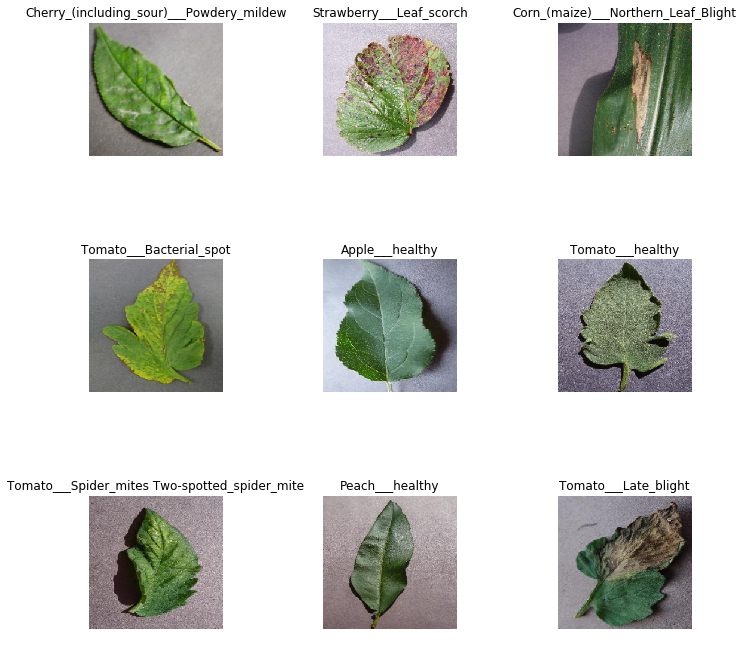

In [11]:
data.show_batch(rows=3, figsize=(10,10))

In [12]:
print(data.classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27799976.80it/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.226269,0.128711,0.042261,05:44
1,0.137223,0.060677,0.018967,05:45
2,0.070619,0.040811,0.013627,05:45
3,0.042524,0.035141,0.010957,05:43


In [0]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

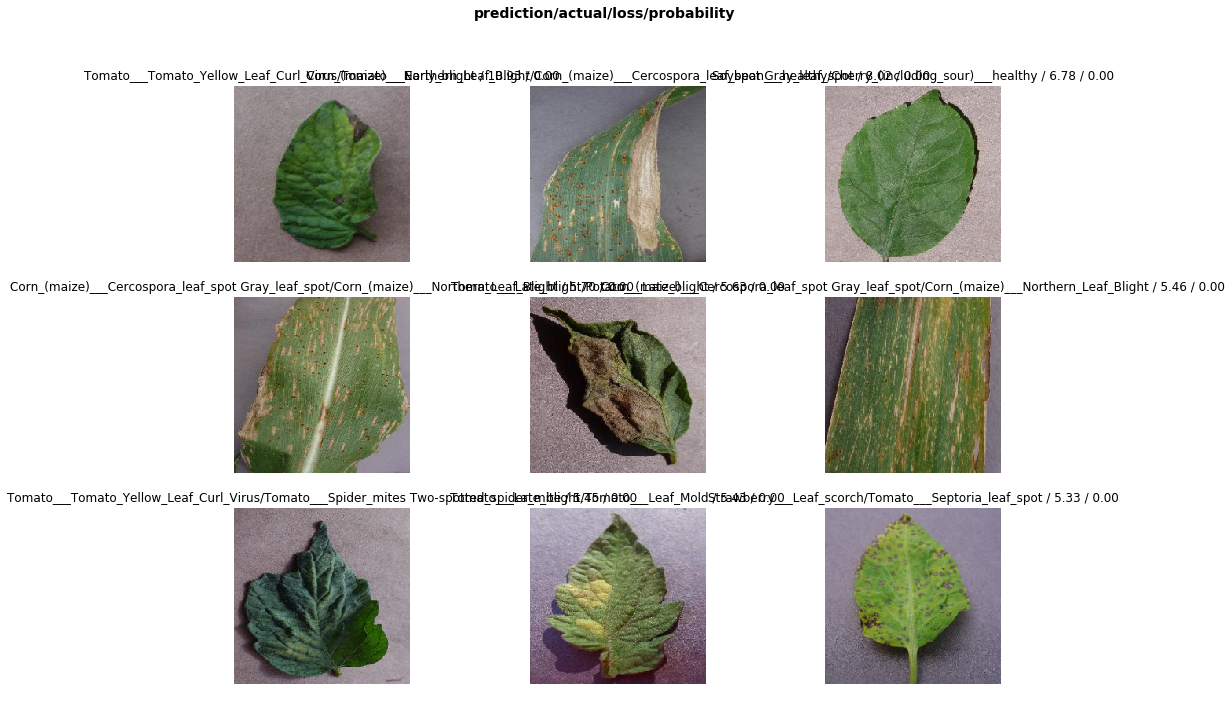

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

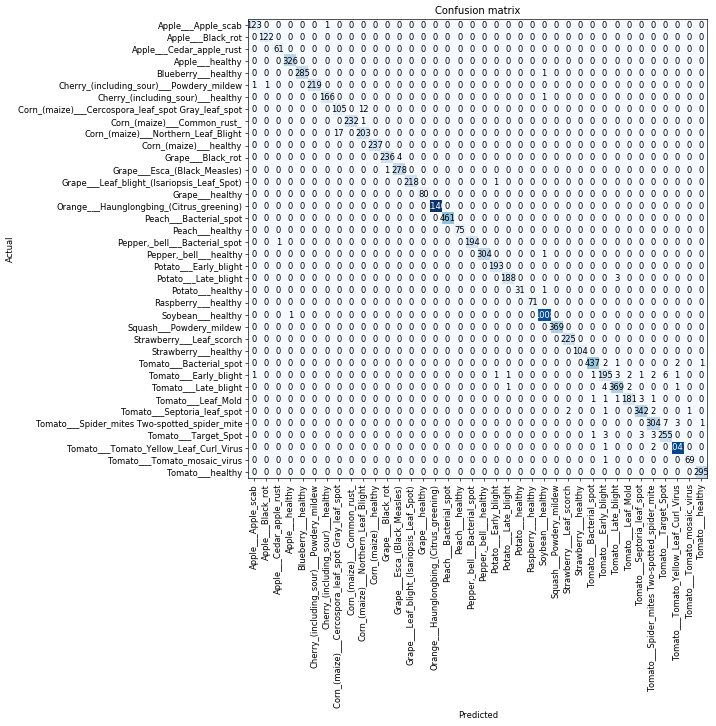

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)


[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  17),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  12),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 7),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 6),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 4),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 4),
 ('Potato___Late_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 3),
 ('Tomato___Spider_mites Two-spotted_spider_mite',
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  3),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 3),
 ('Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 3),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 3),
 ('Tomato___Bacterial_spot', 'Tomato___Early_blight', 2),
 ('Tomato___Bacterial_

In [0]:
learn.unfreeze()


In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.038037,0.017519,0.005156,07:48


In [0]:
learn.load('stage-1');

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


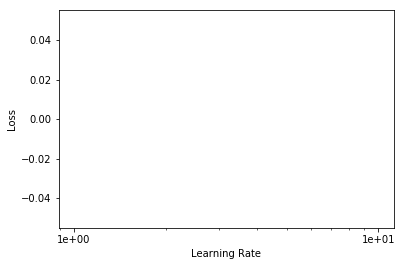

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.032098,0.032272,0.010588,07:48
1,0.024424,0.031150,0.010496,07:48


In [0]:
learn.save('stage-2')

In [29]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 51739363.88it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


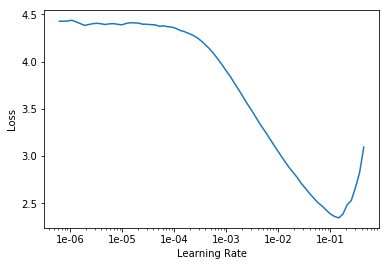

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.206157,0.115355,0.034159,11:56
1,0.115727,0.070309,0.023110,11:52
2,0.076036,0.036376,0.012062,11:52
3,0.045060,0.028735,0.009023,11:52
4,0.022251,0.030143,0.008931,11:52
5,0.010345,0.024319,0.006905,11:49
6,0.007413,0.020332,0.005340,11:51
7,0.005712,0.020248,0.006261,11:52


In [0]:
learn.save('stage-1-50')

In [33]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.008185,0.023160,0.006445,15:47
1,0.004852,0.019425,0.006077,15:44
2,0.002770,0.016984,0.005524,15:44


In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [36]:
interp.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  19),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  7),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 4),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 4),
 ('Potato___Late_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 3),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 2),
 ('Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 2),
 ('Tomato___Late_blight', 'Potato___Late_blight', 2),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 2)]

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
%cd /content/drive/My Drive/sathelp

/content/drive/My Drive/sathelp


In [0]:
!cp '/content/PlantVillage-Dataset/raw/color/models/stage-1-50.pth' .

In [0]:
!cp '/content/PlantVillage-Dataset/raw/color/models/stage-1.pth' .

In [0]:
!cp '/content/PlantVillage-Dataset/raw/color/models/stage-2.pth' .

In [0]:
!cp '/content/PlantVillage-Dataset/raw/color/models/tmp.pth' .